In [1]:
# Name: Sufiya Mulla
# Batch : July 5 
# problem statement no 2 : Movie Rating Prediction

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#importing datasets
movies = pd.read_csv('G://data/Movie_rating/movies.dat', sep='::', engine='python', encoding='latin1')
users =  pd.read_csv('G://data/Movie_rating/users.dat', sep='::', engine='python', encoding='latin1')
rating =  pd.read_csv('G://data/Movie_rating/ratings.dat/ratings.dat', sep='::', engine='python', encoding='latin1')

In [10]:
# movies dataset analysis
movies.head() # top 5 rows # obj: there is no header

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [11]:
movies.columns = ['Movie_IDs','Movie_Name','Genres']# giving headers
movies

,Movie_IDs,Movie_Name,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [12]:
movies.info() # checking columns, data types, and null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie_IDs   3882 non-null   int64 
 1   Movie_Name  3882 non-null   object
 2   Genres      3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [13]:
movies.isnull().sum() # checking for exact null value count

Movie_IDs     0
Movie_Name    0
Genres        0
dtype: int64

In [14]:
movies['Genres'].value_counts() # checking the different genres

Drama                              843
Comedy                             521
Horror                             178
Comedy|Drama                       162
Comedy|Romance                     142
                                  ... 
Action|Comedy|Sci-Fi|War             1
Action|Romance|War                   1
Action|Drama|Thriller|War            1
Action|Adventure|Children's          1
Adventure|Crime|Sci-Fi|Thriller      1
Name: Genres, Length: 301, dtype: int64

In [15]:
# users dataset analysis
users.head()

,User_id,Gender,Age,occupation,Zip code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [16]:
users.columns=['User_id','Gender','Age','occupation','Zip code']
users

,User_id,Gender,Age,occupation,Zip code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [17]:
users.isnull().sum()

User_id       0
Gender        0
Age           0
occupation    0
Zip code      0
dtype: int64

In [18]:
users.describe()

,User_id,Age,occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


C:\Users\cli\AppData\Local\Temp\ipykernel_35600\655517207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users['Age']) # exporing more in depth with plotting of graph


Text(0.5, 1.0, 'Age vs Age density')

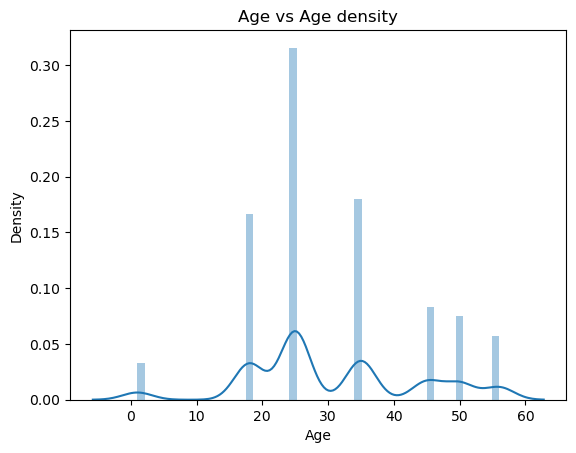

In [19]:
sns.distplot(users['Age']) # exporing more in depth with plotting of graph
plt.title('Age vs Age density')

Text(0.5, 1.0, 'Occupation analysis')

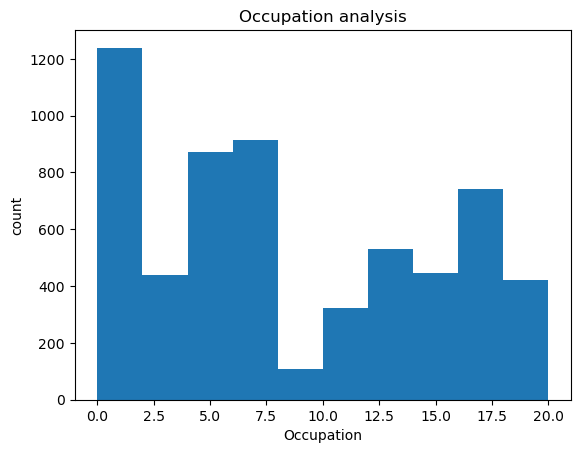

In [20]:
plt.hist(users['occupation'])
plt.xlabel("Occupation")
plt.ylabel("count")
plt.title("Occupation analysis")

In [21]:
users.replace({'Gender':{'M':0,'F':1}}, inplace=True) #conversion of categorical
users.head()


,User_id,Gender,Age,occupation,Zip code
0,2,0,56,16,70072
1,3,0,25,15,55117
2,4,0,45,7,02460
3,5,0,25,20,55455
4,6,1,50,9,55117


In [22]:
#users dataset analysis
rating.head()

,ID,Movie_ID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [25]:
rating.columns =['ID','Movie_ID','Rating','Timestamp']
rating.head()

,ID,Movie_ID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


Text(0.5, 1.0, 'Rating vs count')

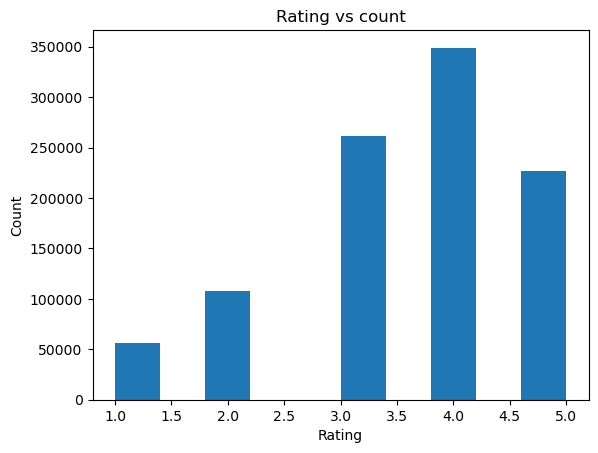

In [26]:
plt.hist(rating['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating vs count')

In [131]:
# merging or mixing the datasets together
df = pd.concat([movies,users,rating],axis=1)

In [132]:
df

,Movie_IDs,Movie_Name,Genres,User_id,Gender,Age,occupation,Zip code,ID,Movie_ID,Rating,Timestamp
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,0.0,56.0,16.0,70072,1,661,3,978302109
1,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,0.0,25.0,15.0,55117,1,914,3,978301968
2,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,0.0,45.0,7.0,02460,1,3408,4,978300275
3,5.0,Father of the Bride Part II (1995),Comedy,5.0,0.0,25.0,20.0,55455,1,2355,5,978824291
4,6.0,Heat (1995),Action|Crime|Thriller,6.0,1.0,50.0,9.0,55117,1,1197,3,978302268
...,...,...,...,...,...,...,...,...,...,...,...,...
1000203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1091,1,956716541
1000204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1094,5,956704887
1000205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,562,5,956704746
1000206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1096,4,956715648


In [57]:
#again taking a look at mergerd datsset
df.head() 

,Movie_ID,Movie_Name,Genres,User_id,Gender,Age,occupation,Zip code,ID,Movie_ID,Rating,Timestamp
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,0.0,56.0,16.0,70072,1,661,3,978302109
1,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,0.0,25.0,15.0,55117,1,914,3,978301968
2,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,0.0,45.0,7.0,02460,1,3408,4,978300275
3,5.0,Father of the Bride Part II (1995),Comedy,5.0,0.0,25.0,20.0,55455,1,2355,5,978824291
4,6.0,Heat (1995),Action|Crime|Thriller,6.0,1.0,50.0,9.0,55117,1,1197,3,978302268


In [58]:
df.tail()

,Movie_ID,Movie_Name,Genres,User_id,Gender,Age,occupation,Zip code,ID,Movie_ID,Rating,Timestamp
1000203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1091,1,956716541
1000204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1094,5,956704887
1000205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,562,5,956704746
1000206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1096,4,956715648
1000207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6040,1097,4,956715569


In [59]:
df.isnull().sum()

Movie_ID      996326
Movie_Name    996326
Genres        996326
User_id       994169
Gender        994169
Age           994169
occupation    994169
Zip code      994169
ID                 0
Movie_ID           0
Rating             0
Timestamp          0
dtype: int64

In [133]:
# droping the null values
df = df.dropna()    
df.isnull().sum()

Movie_IDs     0
Movie_Name    0
Genres        0
User_id       0
Gender        0
Age           0
occupation    0
Zip code      0
ID            0
Movie_ID      0
Rating        0
Timestamp     0
dtype: int64

In [97]:
df.shape

(3882, 12)

In [79]:
df.head()

,Movie_ID,Movie_Name,Genres,User_id,Gender,Age,occupation,Zip code,ID,Movie_ID,Rating,Timestamp
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,2.0,0.0,56.0,16.0,70072,1,661,3,978302109
1,3.0,Grumpier Old Men (1995),Comedy|Romance,3.0,0.0,25.0,15.0,55117,1,914,3,978301968
2,4.0,Waiting to Exhale (1995),Comedy|Drama,4.0,0.0,45.0,7.0,02460,1,3408,4,978300275
3,5.0,Father of the Bride Part II (1995),Comedy,5.0,0.0,25.0,20.0,55455,1,2355,5,978824291
4,6.0,Heat (1995),Action|Crime|Thriller,6.0,1.0,50.0,9.0,55117,1,1197,3,978302268


In [137]:
features = df[['Movie_IDs','Age','occupation','Gender','ID']]         # features
target = df[['Rating']]                                               #target

In [138]:
#splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=10)

In [139]:
#importing the model
knn = KNeighborsClassifier(n_neighbors = 3) 

knn.fit(x_train, y_train) #fitting the training data

Y_pred = knn.predict(x_test) # predicting 

acc_knn = round(knn.score(x_train, y_train) * 100, 2) #finding out the accuracy score
acc_knn

C:\Users\cli\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


59.58